In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## checking for null values 

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(content)

## checking for categorical/string values 

In [7]:
for label, content  in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

species


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

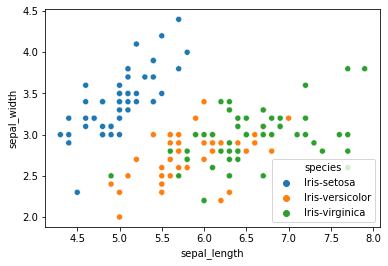

In [8]:
sns.scatterplot(x ='sepal_length' , y ='sepal_width' , hue= 'species', data= data)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

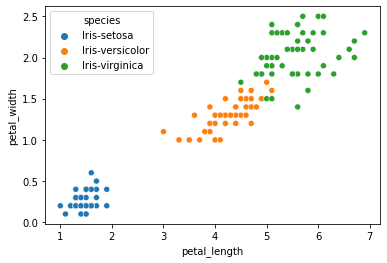

In [18]:
sns.scatterplot(x = "petal_length", y = "petal_width", hue = "species", data = data)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

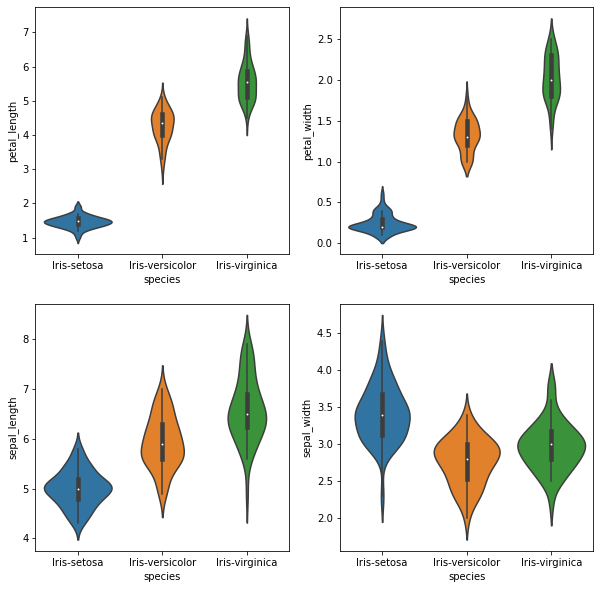

In [9]:
plt.figure(figsize= (10,10)) 
plt.subplot(2,2,1)
sns.violinplot(x ='species', y = 'petal_length', data= data)

 
plt.subplot(2,2,2)
sns.violinplot(x ='species', y = 'petal_width', data= data)
 
plt.subplot(2,2,3)
sns.violinplot(x ='species', y = 'sepal_length', data= data)

plt.subplot(2,2,4)
sns.violinplot(x ='species', y = 'sepal_width', data= data)

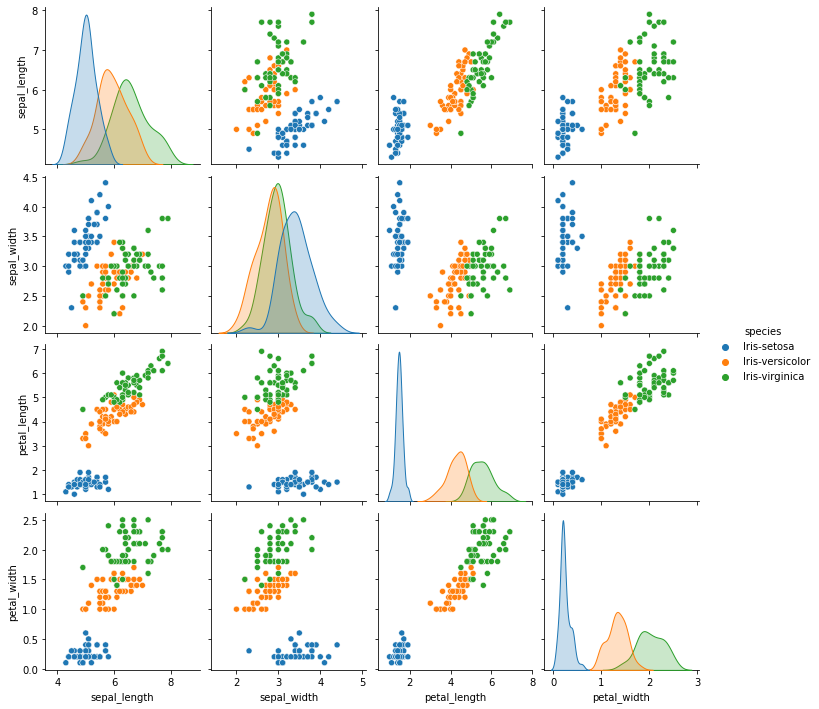

In [10]:
sns.pairplot(data, hue= 'species')

<AxesSubplot:>

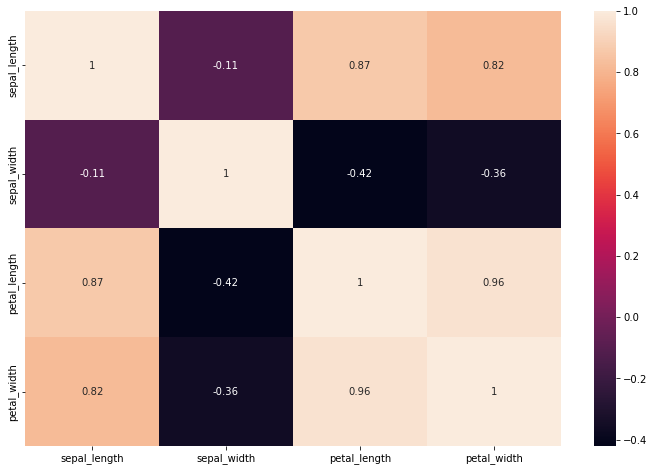

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

In [23]:
X= data.drop(['species'], axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y = data["species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [27]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [28]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [29]:
y_train.head()

96     Iris-versicolor
105     Iris-virginica
66     Iris-versicolor
0          Iris-setosa
122     Iris-virginica
Name: species, dtype: object

In [30]:
y_test.head()

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: species, dtype: object

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
classifier = KNeighborsClassifier(n_neighbors= 3, metric= "minkowski",p=2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



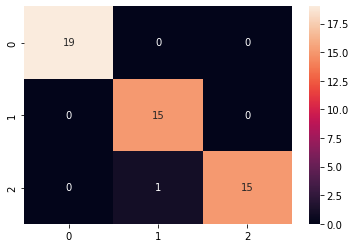

In [32]:
y_predict = classifier.predict(X_test)
y_predict
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)
print(classification_report(y_test,y_predict))

In [22]:
import sklearn
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)
accuracy

0.98

In [23]:
## Creating pickle file uusing serialization
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [26]:
classifier.predict([[0,0,0,0]])

array(['Iris-setosa'], dtype=object)

In [25]:
# def predict_IRIS_Flower():
#     """Lets Pedict the flowers type
#     this is using docstrings for specificatios.
#     ---
#     parameters:
#         - name: file
#         in: formData
#         type: file
#         required: true
        
#     responses:
#         200:
#             description: the output values
# """
#     df_test = pd.read_csv(request.file.get("file"))
#     print(df_test.head())
#     prediction = classifier.predict(df_test)